In [42]:
import pandas as pd
import numpy as np
import seaborn as sb

In [53]:
data = pd.read_csv('Loan_data.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
data.shape

(614, 13)

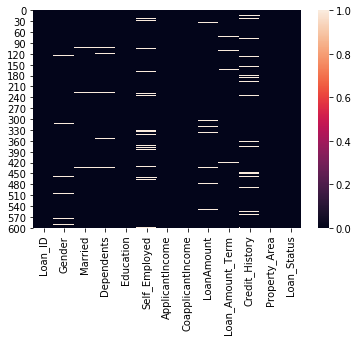

In [55]:
sb.heatmap(data.isnull())

In [17]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>=1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round((data[feature].isnull().sum())/len(data[feature]),4),'% missing values')

Gender 0.0212 % missing values
Married 0.0049 % missing values
Dependents 0.0244 % missing values
Self_Employed 0.0521 % missing values
LoanAmount 0.0358 % missing values
Loan_Amount_Term 0.0228 % missing values
Credit_History 0.0814 % missing values


In [19]:
for feature in features_with_na:
    print(feature, (data[feature].isnull().sum()))

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


### 1. Drop the rows with null values

In [20]:
# keep in mind before dropping the rows with null values, check the percentage of data we are going to lose.
# If the losing percentage is more than 5% then be careful. because rows with null values may have different 
# patterns with dependent variables

#
data_drop = data.dropna()
100 - (len(data_drop)/len(data)*100 )    
#percentage of data we lost 

21.82410423452768

### 2. Drop the columns with most missing values

In [24]:
# here dropping the column. Credit_history column has 50 missing values out of 614 records. 
# usually we drop a column, which has 1-5% of non na values
data.drop('Credit_History',axis=1,inplace=True)     
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Note :Some times we drop columns when we found column is redundant

### 3.Mean Imputation
for Numerical variables

In [25]:
data.LoanAmount.describe() # before imputation

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [26]:
# Mean imputation can change the pattern. so careful while doing this imputation
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())     #to fill NaN by mean. 
data.isnull().sum()
  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
data.LoanAmount.describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

### 4. Mode Imputation
For categorical variables

In [ ]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [35]:
#data.drop(['Loan_ID'],axis=1,inplace=True)
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,' : ',data[i].isnull().sum(),end=' Null values: ')
        print('\n', data[i].value_counts())
        print()

Gender  :  13 Null values: 
 Male      489
Female    112
Name: Gender, dtype: int64

Married  :  3 Null values: 
 Yes    398
No     213
Name: Married, dtype: int64

Dependents  :  15 Null values: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education  :  0 Null values: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed  :  32 Null values: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area  :  0 Null values: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status  :  0 Null values: 
 Y    422
N    192
Name: Loan_Status, dtype: int64



In [ ]:
# from the above output for categorical variables, we can do mode imputations as null values numbers are small and 
# also one level in each categorical variables has majority values. 
# if the levels in categorical variables have less difference in the values, then mode imputation is not a good idea

In [36]:
data['Gender'].value_counts()  # before mode imputation

Male      489
Female    112
Name: Gender, dtype: int64

In [38]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'].value_counts()  # after imputation

Male      502
Female    112
Name: Gender, dtype: int64

### 5.Median Imputation
when outliers are present

In [51]:
data1 = pd.read_csv('Loan_data.csv')
data2=datas=data1

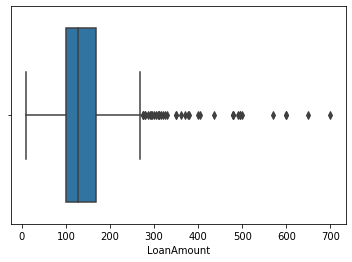

In [43]:
sb.boxplot(data1.LoanAmount)   # here we can see outliers. In this place its good go to with median

In [44]:
data1.LoanAmount=data1.LoanAmount.fillna(data1.LoanAmount.median())     
data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 6. BAckward imputation

In [47]:
data3=data2

# this for whole data
data2= data2.fillna(method='bfill')          #backward fill-take below value: for last row bfill wont work
data2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
data2= data2.LoanAmount.fillna(method='bfill')            #for particular column    
data2.isnull().sum()

0

### 7. Forward fill imputation

In [50]:
data3= data3.fillna(method='ffill')          #wont fill first row
data3.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 8 Imputation with condition

In [52]:
# sometimes we just cant impute with mean or median, we need to consider other variables how other variables can also play a role for the particular missing value column. 
# in that case, we go with conditions

# here based on gender, we fill na with mean values
datas=datas.LoanAmount.fillna(datas.groupby('Gender')['LoanAmount'].transform('mean'))  
#transform will do mapping based on gender
datas.isnull().sum()

0

In [ ]:
#data8=data_org.LoanAmount.fillna(data_org.groupby('Gender')['LoanAmount'].mean())    #this wont work  *******************

In [ ]:
# based on both gender and marrital status
#data=data.LoanAmount.fillna(data.groupby(['Gender','Married'])['LoanAmount'].transform('mean'))   #transform will do mapping based on gender
#data[data.isnull()]


### 9. Fill with some values

In [ ]:
data= data.Dependents.fillna(0)    # can directly fill--> if no dependents are there then we can fill 0
data.isnull().sum()